In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
fake = pd.read_csv("Data/Fake.csv")

In [22]:
fake.sample(5)

,title,text,subject,date
16538,FEDERAL AUDIT: YOU WON’T BELIEVE HOW OBAMA FAV...,What in the world is it with Obama and crimina...,Government News,"Jun 24, 2016"
4408,"Donald Trump Proves He Hates Women, Calls Rep...",Donald Trump s misogynistic behavior towards w...,News,"October 1, 2016"
19655,SPECTACULAR! LEFTIST MEDIA MELTS DOWN When The...,They pulled every trick in the book. From manu...,left-news,"Nov 9, 2016"
20441,SURPRISE! HISPANIC REPORTER Tries To Call Inju...,This video is just one of many examples showin...,left-news,"Jun 11, 2016"
19478,OOPS! OBAMA Tells Troops No Foreign Terror Att...,In a speech at MacDill Air Force Base in Tamp...,left-news,"Dec 9, 2016"


In [23]:
true = pd.read_csv("Data/True.csv")

In [24]:
true.sample(5)

,title,text,subject,date
18459,"In latest twist in Japan election drama, Tokyo...","TOKYO (Reuters) - Tokyo Governor Yuriko Koike,...",worldnews,"October 3, 2017"
18476,Brazil's largest ever corruption probe nearing...,SAO PAULO (Reuters) - Brazilian federal Judge ...,worldnews,"October 2, 2017"
4256,Separate mothers and children: How a Trump thr...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"April 13, 2017"
3813,Senators pledge aggressive Russia probe after ...,WASHINGTON (Reuters) - The leaders of the Sena...,politicsNews,"May 11, 2017"
16017,South Africa's Zuma asks court to set aside re...,JOHANNESBURG (Reuters) - South African Preside...,worldnews,"October 31, 2017"


## Dimesiones del dataset

In [25]:
true.shape

(21417, 4)

In [26]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [27]:
fake.shape

(23481, 4)

In [28]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


## Temas

In [29]:
import plotly.express as px

fig = px.bar(
    fake.subject.value_counts(),
    color_discrete_sequence= px.colors.qualitative.Safe,
)
fig.show()

In [30]:
fig = px.bar(
    true.subject.value_counts(),
    color_discrete_sequence= px.colors.qualitative.Safe,
)
fig.show()

## Wordcloud

In [31]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')

### Wordclouds para fake news

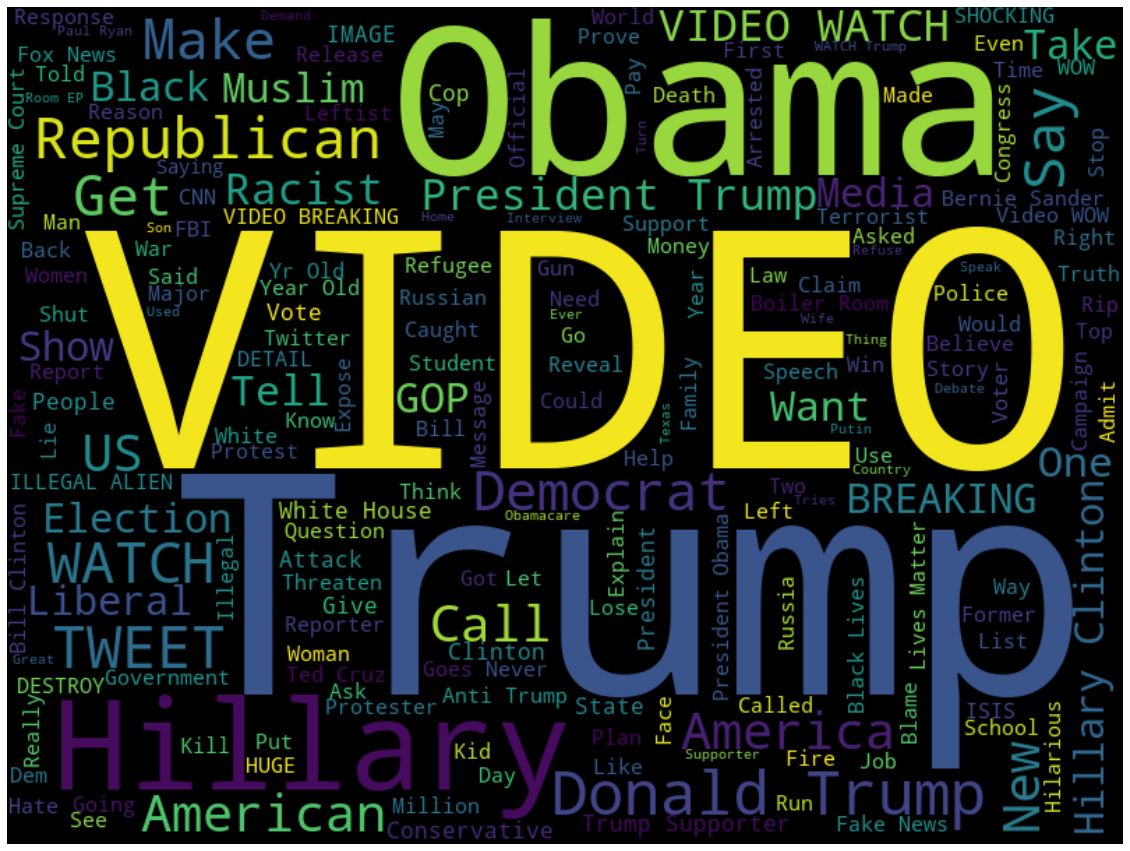

In [32]:
wordcloud = WordCloud(width = 800, height = 600, stopwords = english_stopwords)

wordcloud.generate(" ".join(fake.title))

# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

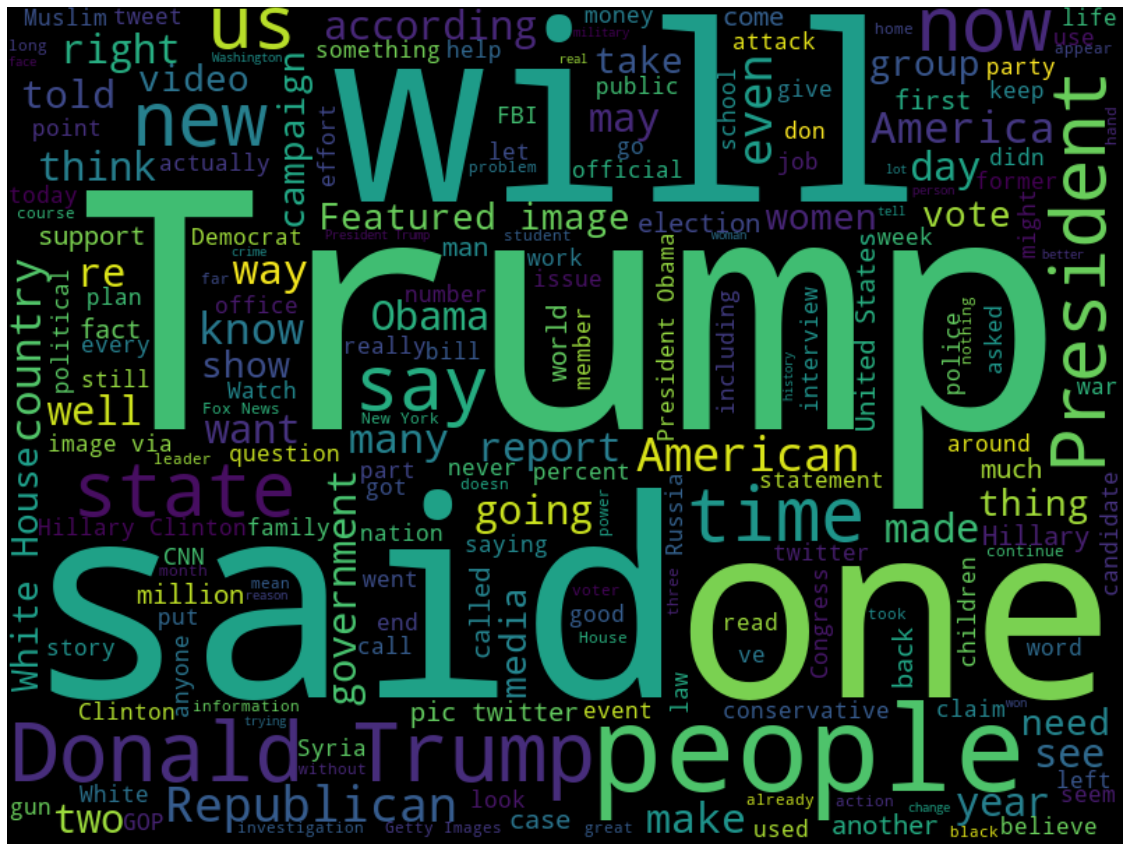

In [33]:
wordcloud = WordCloud(width = 800, height = 600).generate(" ".join(fake.text.sample(1000)))

# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Wordclouds para noticias reales

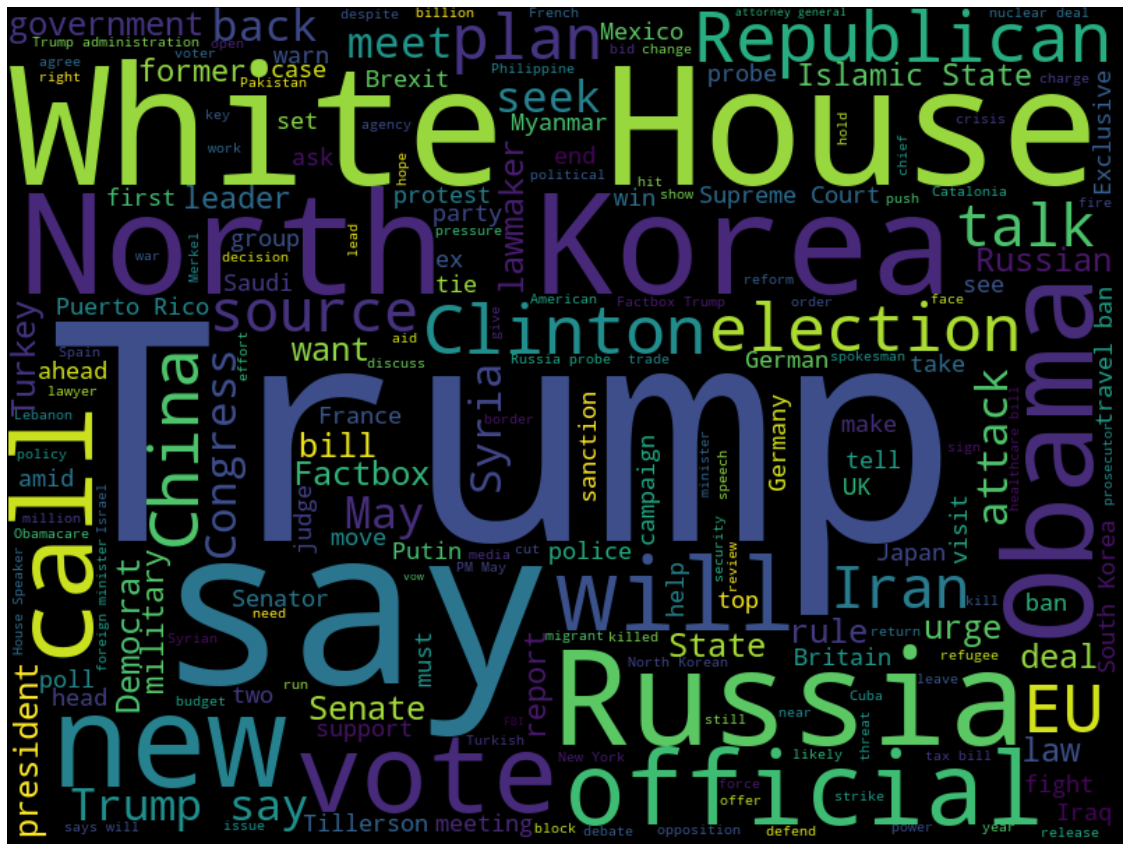

In [34]:
wordcloud = WordCloud(width = 800, height = 600).generate(" ".join(true.title))

# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

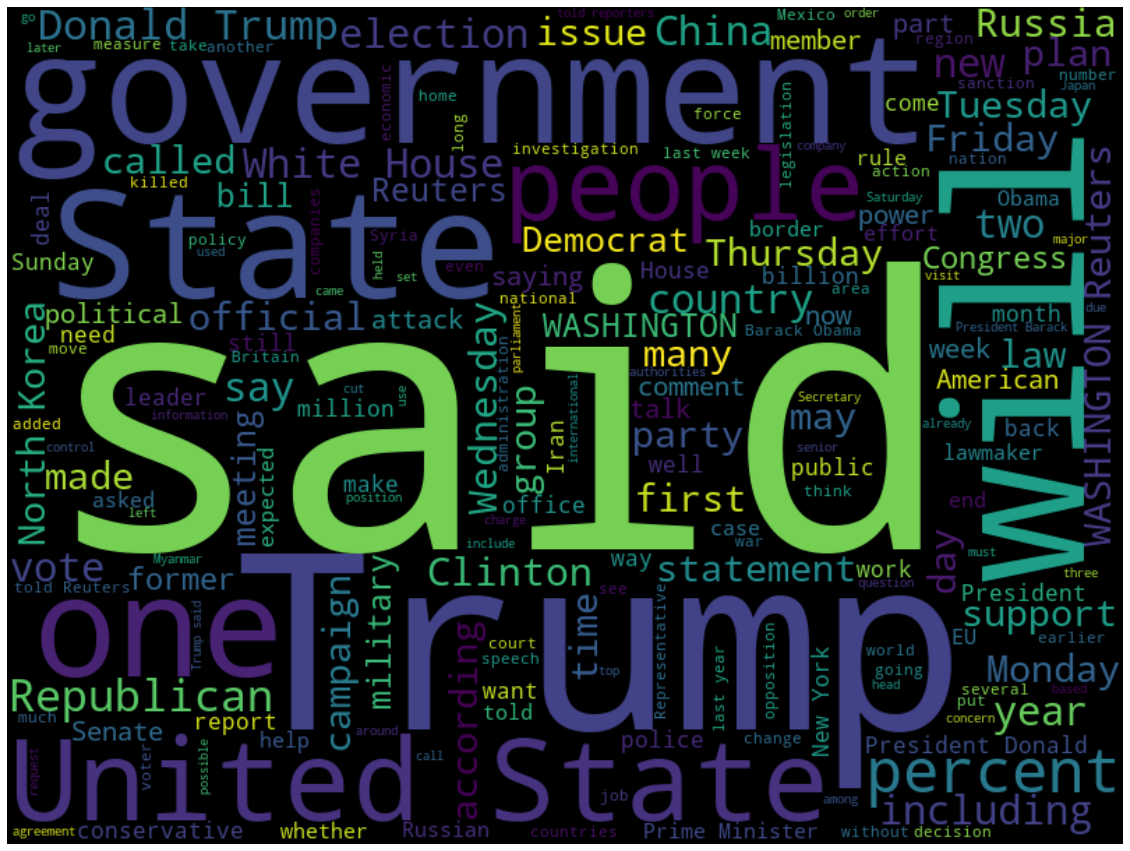

In [35]:
wordcloud = WordCloud(width = 800, height = 600).generate(" ".join(true.text.sample(1000)))

# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Union de dataset

In [36]:
fake["fake"] = 1
true["fake"] = 0

dataset = pd.concat([fake, true])

In [37]:
dataset

,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [38]:
dataset.to_csv("data/real-fake-news.csv")